## Read covid dataframe

In [3]:
import pandas as pd

#read the covid dataset
covid_df = pd.read_csv("../../../data/output/covid.csv")
covid_df.head(2)

,Unnamed: 0,countyFIPS,County Name,State,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,...,10/7/20_y,10/8/20_y,10/9/20_y,10/10/20_y,10/11/20_y,10/12/20_y,10/13/20_y,10/14/20_y,10/15/20_y,10/16/20_y
0,0,0,Statewide Unallocated,AL,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,1,0,0,0,0,...,27,28,28,28,28,28,28,28,28,28


## Make state as an index of the data frame and displaye dataframe from rows 30 to 40

In [4]:
#groupby dataframe based on state
states = covid_df.groupby(['State']).sum()

#choose rows from 30 to 40 an display the datafram
states = states[30:40:]
states

,Unnamed: 0,countyFIPS,population,stateFIPS,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,...,10/7/20_y,10/8/20_y,10/9/20_y,10/10/20_y,10/11/20_y,10/12/20_y,10/13/20_y,10/14/20_y,10/15/20_y,10/16/20_y
State,,,,,,,,,,,,,,,,,,,,,
NH,19789,330100,1359711,363,0,0,0,0,0,0,...,446,448,450,455,456,456,456,458,463,465
NJ,39941,714441,8882190,748,0,0,0,0,0,0,...,16145,16159,16161,16167,16170,16170,16177,16191,16197,16202
NM,62679,1155995,2096829,1190,0,0,0,0,0,0,...,896,899,902,907,911,915,918,921,922,928
NV,32121,544774,3080156,576,0,0,0,0,0,0,...,1636,1649,1657,1659,1661,1664,1664,1691,1691,1707
NY,121120,2235844,19453561,2304,0,0,0,0,0,0,...,33041,33053,33060,33069,33075,33089,33100,33108,33127,33140
OH,189036,3439744,11689100,3471,0,0,0,0,0,0,...,4969,4982,4993,4996,4998,5004,5017,5033,5038,5054
OK,172185,3085929,3956971,3120,0,0,0,0,0,0,...,1075,1085,1091,1095,1098,1104,1119,1132,1143,1154
OR,83805,1477296,4217737,1517,0,0,0,0,0,0,...,583,594,597,599,599,599,604,607,610,617
PA,157590,2818489,12801989,2856,0,0,0,0,0,0,...,8272,8272,8272,8272,8368,8368,8368,8410,8431,8457


## display the last week of 10 states (NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI) for confirmed cases

In [5]:
#choose the last week of the corresponding states for confirmed cases 
covid_df_confirmed = states[states.columns[(states.columns.get_loc("9/14/20_x"))-6:(states.columns.get_loc("9/14/20_x"))+1]]

# calculate the substraction between first day of week and last day of week for each state
Increase_Decrease = []
for i in range(len(covid_df_confirmed)):
     Increase_Decrease.append(covid_df_confirmed["9/14/20_x"][i] - covid_df_confirmed["9/8/20_x"][i])
    
#display the data frame which shows the confirmed cases of each day of last week and the substraction 
# of fist and last day of week
covid_df_confirmed["Increase"] = Increase_Decrease
covid_df_confirmed

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,9/8/20_x,9/9/20_x,9/10/20_x,9/11/20_x,9/12/20_x,9/13/20_x,9/14/20_x,Increase
State,,,,,,,,
NH,7493,7517,7573,7620,7652,7696,7714,221
NJ,194661,194988,195414,195888,196334,196634,196966,2305
NM,26177,26264,26426,26560,26656,26757,26838,661
NV,72052,72200,72485,72738,73144,73453,73732,1680
NY,440716,441292,442049,442929,443778,444503,445086,4370
OH,131990,132965,134087,135325,136567,137400,138480,6490
OK,65047,65926,66697,67637,68658,69349,70223,5176
OR,28353,28468,28651,28863,29143,29332,29480,1127
PA,140354,141287,141877,142885,143804,143879,145063,4709


## Display scatter plot of each state during last week

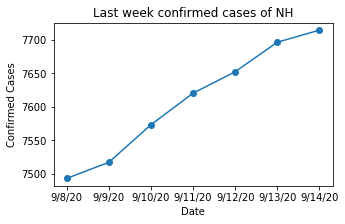

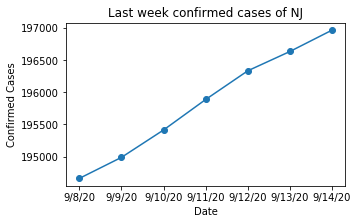

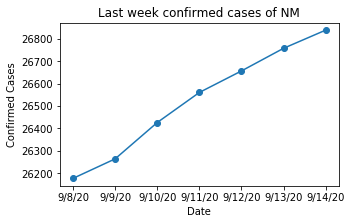

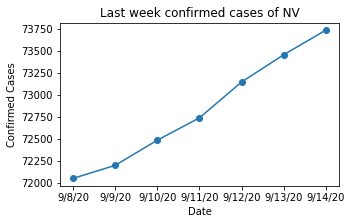

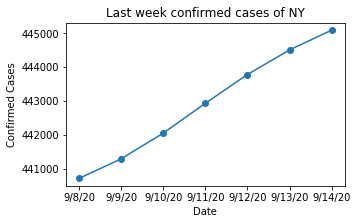

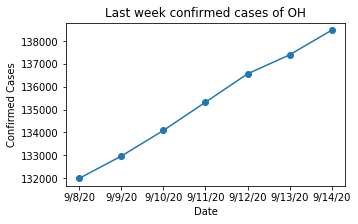

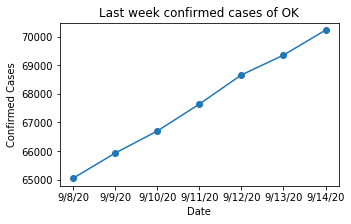

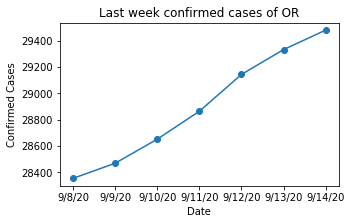

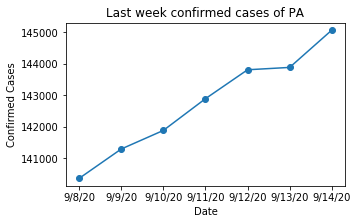

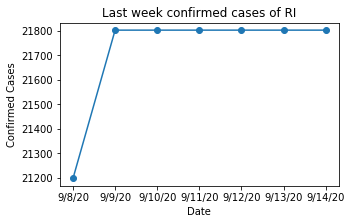

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Scatter plot of NH
x = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y = covid_df_confirmed.loc[ 'NH' , covid_df_confirmed.columns[:-1] ]
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(x, y)
plt.title('Last week confirmed cases of NH')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of NJ
x1 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y1 = covid_df_confirmed.loc[ 'NJ' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x1, y1)
plt.plot(x1, y1)
plt.title('Last week confirmed cases of NJ')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of NM
x2 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y2 = covid_df_confirmed.loc[ 'NM' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x2, y2)
plt.plot(x2, y2)
plt.title('Last week confirmed cases of NM')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of NV
x3 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y3 = covid_df_confirmed.loc[ 'NV' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x3, y3)
plt.plot(x3, y3)
plt.title('Last week confirmed cases of NV')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of NY
x4 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y4 = covid_df_confirmed.loc[ 'NY' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x4, y4)
plt.plot(x4, y4)
plt.title('Last week confirmed cases of NY')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of OH
x5 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y5 = covid_df_confirmed.loc[ 'OH' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x5, y5)
plt.plot(x5, y5)
plt.title('Last week confirmed cases of OH')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of OK
x6 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y6 = covid_df_confirmed.loc[ 'OK' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x6, y6)
plt.plot(x6, y6)
plt.title('Last week confirmed cases of OK')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of OR
x7 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y7 = covid_df_confirmed.loc[ 'OR' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x7, y7)
plt.plot(x7, y7)
plt.title('Last week confirmed cases of OR')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of PA
x8 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y8 = covid_df_confirmed.loc[ 'PA' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x8, y8)
plt.plot(x8, y8)
plt.title('Last week confirmed cases of PA')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

#Scatter plot of RI
x9 = ['9/8/20', '9/9/20', '9/10/20', '9/11/20', '9/12/20', '9/13/20','9/14/20']
y9 = covid_df_confirmed.loc[ 'RI' , covid_df_confirmed.columns[:-1]]
plt.figure(figsize=(5,3))
plt.scatter(x9, y9)
plt.plot(x9, y9)
plt.title('Last week confirmed cases of RI')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()




In [7]:
#choose the last week of the corresponding states for death 
covid_df_death = states[states.columns[(states.columns.get_loc("9/14/20_y"))-6:]]

# calculate the substraction between first day of week and last day of week for each state
Increase_Decrease= []
for i in range(len(covid_df_death)):
     Increase_Decrease.append(covid_df_death["9/14/20_y"][i] - covid_df_death["9/8/20_y"][i])
    
#display the data frame which shows death of each day of last week and the substraction of fist and last day of week
covid_df_death["Increase"] = Increase_Decrease
covid_df_death

C:\Users\sanam\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,9/8/20_y,9/9/20_y,9/10/20_y,9/11/20_y,9/12/20_y,9/13/20_y,9/14/20_y,9/15/20_y,9/16/20_y,9/17/20_y,...,10/8/20_y,10/9/20_y,10/10/20_y,10/11/20_y,10/12/20_y,10/13/20_y,10/14/20_y,10/15/20_y,10/16/20_y,Increase
State,,,,,,,,,,,,,,,,,,,,,
NH,433,433,434,434,435,436,436,436,438,438,...,448,450,455,456,456,456,458,463,465,3
NJ,15995,16004,16010,16019,16023,16027,16030,16038,16049,16052,...,16159,16161,16167,16170,16170,16177,16191,16197,16202,35
NM,807,813,816,818,821,823,823,830,832,836,...,899,902,907,911,915,918,921,922,928,16
NV,1393,1412,1429,1439,1449,1449,1456,1482,1494,1506,...,1649,1657,1659,1661,1664,1664,1691,1691,1707,63
NY,32792,32795,32804,32809,32818,32822,32828,32828,32848,32854,...,33053,33060,33069,33075,33089,33100,33108,33127,33140,36
OH,4298,4324,4354,4402,4411,4415,4418,4506,4554,4580,...,4982,4993,4996,4998,5004,5017,5033,5038,5054,120
OK,854,863,876,888,899,905,905,912,924,930,...,1085,1091,1095,1098,1104,1119,1132,1143,1154,51
OR,485,493,496,498,502,508,510,518,519,520,...,594,597,599,599,599,604,607,610,617,25
PA,7790,7805,7820,7837,7837,7837,7869,7875,7903,7913,...,8272,8272,8272,8368,8368,8368,8410,8431,8457,79


## Report for data trends

From column named "Increase", it can be concluded that number of cases of each state has been increasing steadily during the last week.
The plot graph for PA shows that the number of cases from the fist day of the week had increased until 9/12/20, and it stayed stable for one day, but the next day it increased significantly.
Moreover, the graph of RI displays that the number of cases increased on the second day of week, but then, it remained stable.
Number of cases of other states increased with similar trend.